# **Productivity and Internet Data Trends in the USA.**

---
# **Internet Data Processing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/DSA 210 Project Files/Productivity and Internet/internet data.xlsx'
df_internet = pd.read_excel(file_path, skiprows=4)
df_internet = df_internet.dropna(axis=1, how='all')

df_internet_melted = df_internet.melt(
    id_vars=['Country Name'],
    value_vars=[col for col in df_internet.columns if isinstance(col, int)],
    var_name='Year',
    value_name='Internet Users (%)'
)

# Convert Year to int
df_internet_melted['Year'] = df_internet_melted['Year'].astype(int)
df_internet_melted = df_internet_melted.drop(columns='Country Name')

# df_internet_melted

Mounted at /content/drive


---
# **Productivity Data Processing (Labour Productivity and Total Factor Productivity)**

In [ ]:
file_path = '/content/drive/MyDrive/DSA 210 Project Files/Productivity and Internet/total-factor-productivity-major-sectors-historical.xlsx'
df = pd.read_excel(file_path, skiprows=2)

# Filter for Total Factor Productivity in the Private nonfarm business sector
tfp_df = df[
    (df['Sector'] == 'Private business sector') &
    (df['Measure'] == 'Total factor productivity')
]
lp_df = df[
    (df['Sector'] == 'Private business sector') &
    (df['Measure'] == 'Labor productivity')
]

lp_df = lp_df.drop(columns=['NAICS', 'Sector', 'Measure', 'Units'])

lp_df = lp_df.T
lp_df = lp_df.drop(lp_df.columns[1], axis = 1)
lp_df = lp_df.reset_index()
lp_df = lp_df.rename(columns={'index': 'Year'})
lp_df = lp_df.rename(columns={lp_df.columns[1]: 'Labour_Productivity_Index'})

# Drop metadata columns to leave only year values
tfp_df = tfp_df.drop(columns=['NAICS', 'Sector', 'Measure', 'Units'])

tfp_df = tfp_df.T
tfp_df = tfp_df.drop(tfp_df.columns[1], axis = 1)
tfp_df = tfp_df.reset_index()
tfp_df = tfp_df.rename(columns={'index': 'Year'})
tfp_df = tfp_df.rename(columns={tfp_df.columns[1]: 'TFP_Index'})

---
# **Data Merging**

In [ ]:
# Ensure 'Year' is int in both DataFrames
df_internet_melted['Year'] = df_internet_melted['Year'].astype(int)
tfp_df['Year'] = tfp_df['Year'].astype(int)
lp_df['Year'] = lp_df['Year'].astype(int)

# Now merge
merged_df = pd.merge(df_internet_melted, tfp_df, on='Year', how='inner')
merged_df = pd.merge(merged_df, lp_df, on='Year', how='inner')

merged_df


,Year,Internet Users (%),TFP_Index,Labour_Productivity_Index
0,1990,0.784729,78.64,57.045
1,1991,1.163194,78.334,58.034
2,1992,1.724203,80.665,60.696
3,1993,2.271673,80.311,60.79
4,1994,4.862781,80.665,61.167
5,1995,9.237088,80.564,61.631
6,1996,16.419353,81.599,63.135
7,1997,21.616401,82.475,64.45
8,1998,30.093197,83.944,66.658
9,1999,35.848724,85.859,69.374


---
# **Machine Learning: Linear Regression**

# Regression Analysis: Internet Users (%) vs. Labour Productivity Index (LPI)

## Key Results
| Metric               | Value       | Interpretation                                                                 |
|----------------------|-------------|--------------------------------------------------------------------------------|
| **Slope (Coefficient)** | `0.5059`    | For every **1% increase** in Internet Users, LPI increases by **0.506 points**. |
| **Intercept**        | `55.6741`   | Baseline LPI when Internet Users = 0% (theoretical scenario).                  |
| **R-squared (R²)**   | `0.8834`    | **88.3%** of LPI variance is explained by Internet penetration (strong fit).   |
| **Mean Squared Error (MSE)** | `24.9044` | Average prediction error: **√24.9 ≈ 4.99 LPI points**.                          |

---

## Interpretation
### 1. **Positive Relationship** (Slope = 0.5059)
- **Practical Impact**: A 10% rise in Internet Users → **+5.06 LPI points**.
- **Context**: LPI range in your data: **57.0 to 111.6**, so this is a **moderate but meaningful** effect.

### 2. **Strong Explanatory Power** (R² = 0.8834)
- The model captures **88.3%** of LPI variability, suggesting Internet adoption is a **key driver** of productivity trends.
- **Caveat**: Correlation ≠ Causation (other factors like technology adoption may co-vary).

### 3. **Prediction Accuracy** (MSE = 24.9)
- Typical prediction error: **±4.99 LPI points**.
- **Relative Error**: ~5% of the LPI range (acceptable for social science data).

=== Model Performance ===
Slope (Coefficient): 0.5059
Intercept: 55.6741
Mean Squared Error (MSE): 24.9044
R-squared (R²): 0.8834


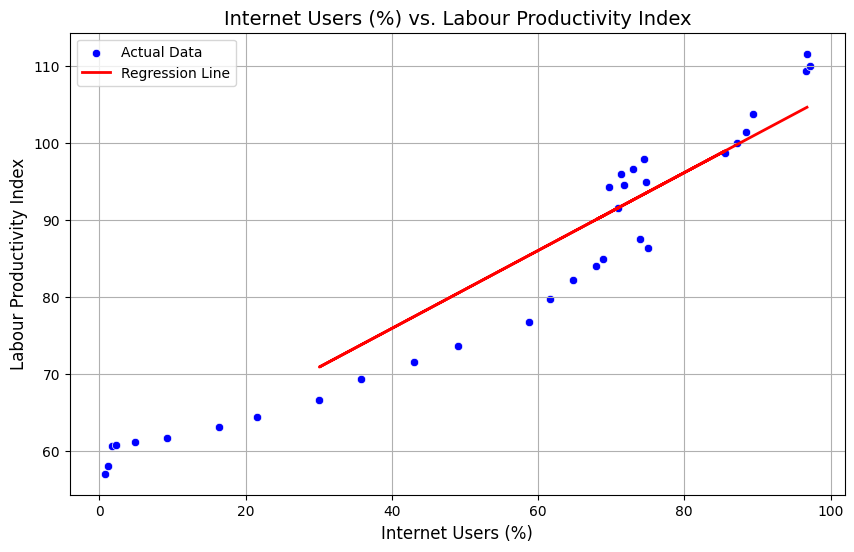

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Select features (X) and target (y)
X = merged_df[['Internet Users (%)']]  # Predictor
y = merged_df['Labour_Productivity_Index']  # Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Model Performance ===")
print(f"Slope (Coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot regression line vs. actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Internet Users (%)'], y=merged_df['Labour_Productivity_Index'], color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Internet Users (%) vs. Labour Productivity Index', fontsize=14)
plt.xlabel('Internet Users (%)', fontsize=12)
plt.ylabel('Labour Productivity Index', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

---
---
# Regression Analysis: Internet Users (%) vs. Total Factor Productivity (TFP)

## Key Results
| Metric               | Value       | Interpretation                                                                 |
|----------------------|-------------|--------------------------------------------------------------------------------|
| **Slope (Coefficient)** | `0.2496`    | Every **1% increase** in Internet Users corresponds to a **0.25-point rise** in TFP. |
| **Intercept**        | `78.1768`   | Baseline TFP when Internet Users = 0% (theoretical scenario).                  |
| **R-squared (R²)**   | `0.9464`    | **94.6%** of TFP variance is explained by Internet penetration (exceptional fit). |
| **Mean Squared Error (MSE)** | `2.4839` | Average prediction error: **√2.48 ≈ 1.57 TFP points**.                          |

---

## Interpretation
### 1. **Positive but Moderate Relationship** (Slope = 0.2496)
- **Practical Impact**: A 10% increase in Internet Users → **+2.5 TFP points**.
- **Context**: TFP range in your data: **~78 to 105**, making this a **small but systematic** effect.

### 2. **Exceptional Explanatory Power** (R² = 0.9464)
- The model explains **94.6%** of TFP variability, indicating Internet adoption is a **dominant predictor**.
- **Caveat**: Near-perfect R² may suggest overfitting or time-series confounding (e.g., both Internet and TFP trend upward over time).

### 3. **High Prediction Precision** (MSE = 2.48)
- Predictions are accurate within **±1.57 TFP points** (~1.5% of the TFP range).

---

## Economic Implications
- **Technology Diffusion**: Internet access likely accelerates adoption of productivity-enhancing tools.
- **Policy Lever**: Expanding broadband infrastructure could yield **long-term productivity gains**.

=== Model Performance ===
Slope (Coefficient): 0.2496
Intercept: 78.1768
Mean Squared Error (MSE): 2.4839
R-squared (R²): 0.9464


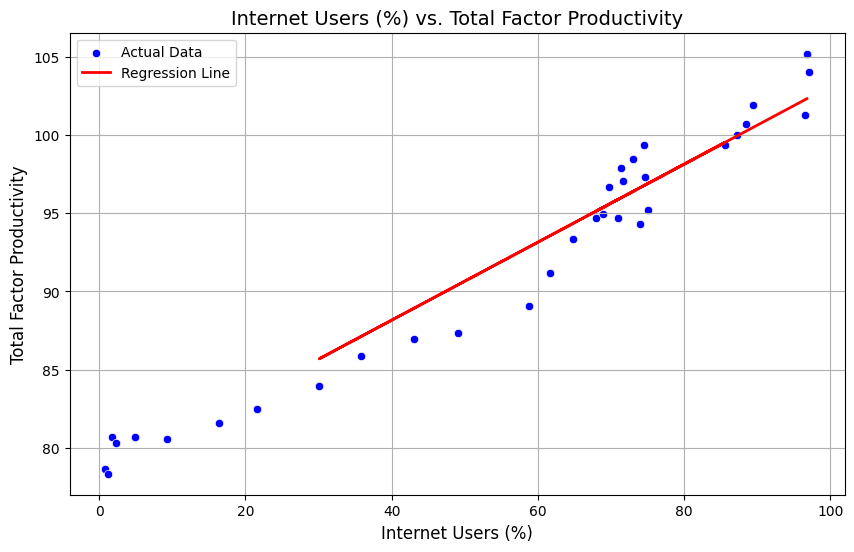

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

# Select features (X) and target (y)
X = merged_df[['Internet Users (%)']]  # Predictor
y = merged_df['TFP_Index']  # Target

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== Model Performance ===")
print(f"Slope (Coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Plot regression line vs. actual data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_df['Internet Users (%)'], y=merged_df['TFP_Index'], color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Internet Users (%) vs. Total Factor Productivity', fontsize=14)
plt.xlabel('Internet Users (%)', fontsize=12)
plt.ylabel('Total Factor Productivity', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

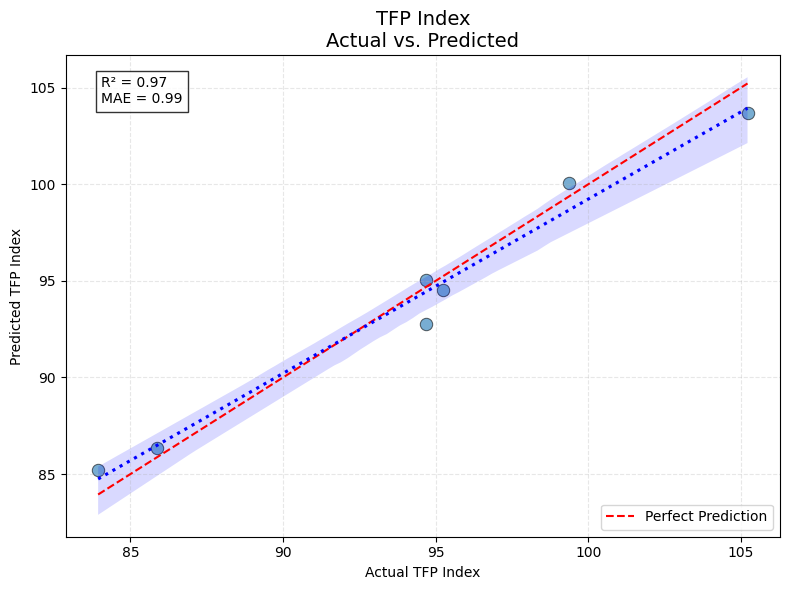

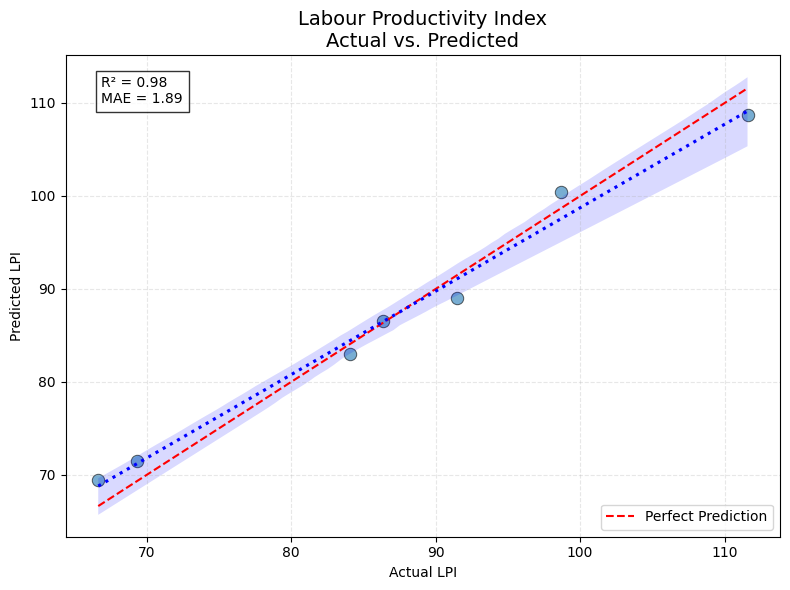

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Convert all columns to numeric (handles strings, missing values, etc.)
new_merged_df = merged_df.apply(pd.to_numeric, errors='coerce')  # 'coerce' turns non-numeric to NaN

# Drop rows with NaN values (if any)
new_merged_df = new_merged_df.dropna()

# ---- Features and Targets ----
X = new_merged_df[["Internet Users (%)", "Year"]]  # Using both Internet and Year
y_tfp = new_merged_df["TFP_Index"]
y_lpi = new_merged_df["Labour_Productivity_Index"]

# ---- Train-Test Split (Stratify by Year if needed) ----
X_train, X_test, y_tfp_train, y_tfp_test = train_test_split(
    X, y_tfp, test_size=0.2, random_state=42, shuffle=True
)
# Use the same split for LPI to ensure comparable time periods
_, X_test_lpi, _, y_lpi_test = train_test_split(
    X, y_lpi, test_size=0.2, random_state=42, shuffle=True
)

# ---- Regression Models ----
model_tfp = LinearRegression()
model_tfp.fit(X_train, y_tfp_train)
tfp_pred = model_tfp.predict(X_test)

model_lpi = LinearRegression()
model_lpi.fit(X_train, y_lpi_train)
lpi_pred = model_lpi.predict(X_test_lpi)  # Use the same X_test split

# ---- Enhanced Plotting Function ----
def plot_results(y_true, y_pred, title, metric_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.6, edgecolor='k', s=80)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Perfect Prediction')

    # Add regression line (trend of predictions)
    sns.regplot(x=y_true, y=y_pred, scatter=False, color='blue', line_kws={'linestyle': ':'})

    # Annotate metrics
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    plt.text(0.05, 0.9, f'R² = {r2:.2f}\nMAE = {mae:.2f}',
             transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

    plt.xlabel(f"Actual {metric_name}")
    plt.ylabel(f"Predicted {metric_name}")
    plt.title(f"{title}\nActual vs. Predicted", fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Generate plots with metrics
plot_results(y_tfp_test, tfp_pred, "TFP Index", "TFP Index")
plot_results(y_lpi_test, lpi_pred, "Labour Productivity Index", "LPI")

---
# **Figures and Plots**

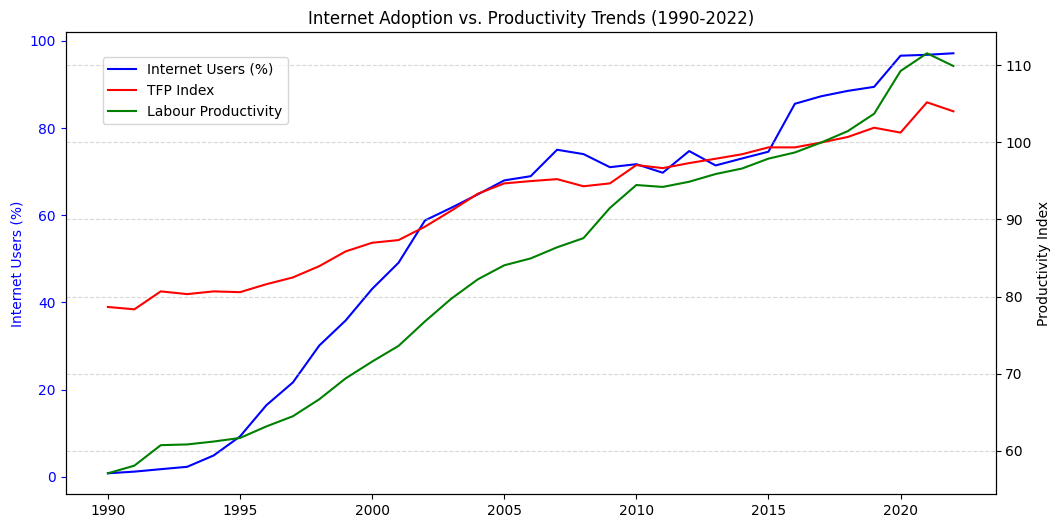

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged_df['Year'],merged_df['Internet Users (%)'], color='blue', label='Internet Users (%)')
ax1.set_ylabel('Internet Users (%)', color='blue')
ax1.tick_params(axis='y', colors='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df['Year'],merged_df['TFP_Index'], color='red', label='TFP Index')
ax2.plot(merged_df['Year'],merged_df['Labour_Productivity_Index'], color='green', label='Labour Productivity')
ax2.set_ylabel('Productivity Index', color='black')

plt.title("Internet Adoption vs. Productivity Trends (1990-2022)")
fig.legend(loc='upper left', bbox_to_anchor=(0.15, 0.85))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

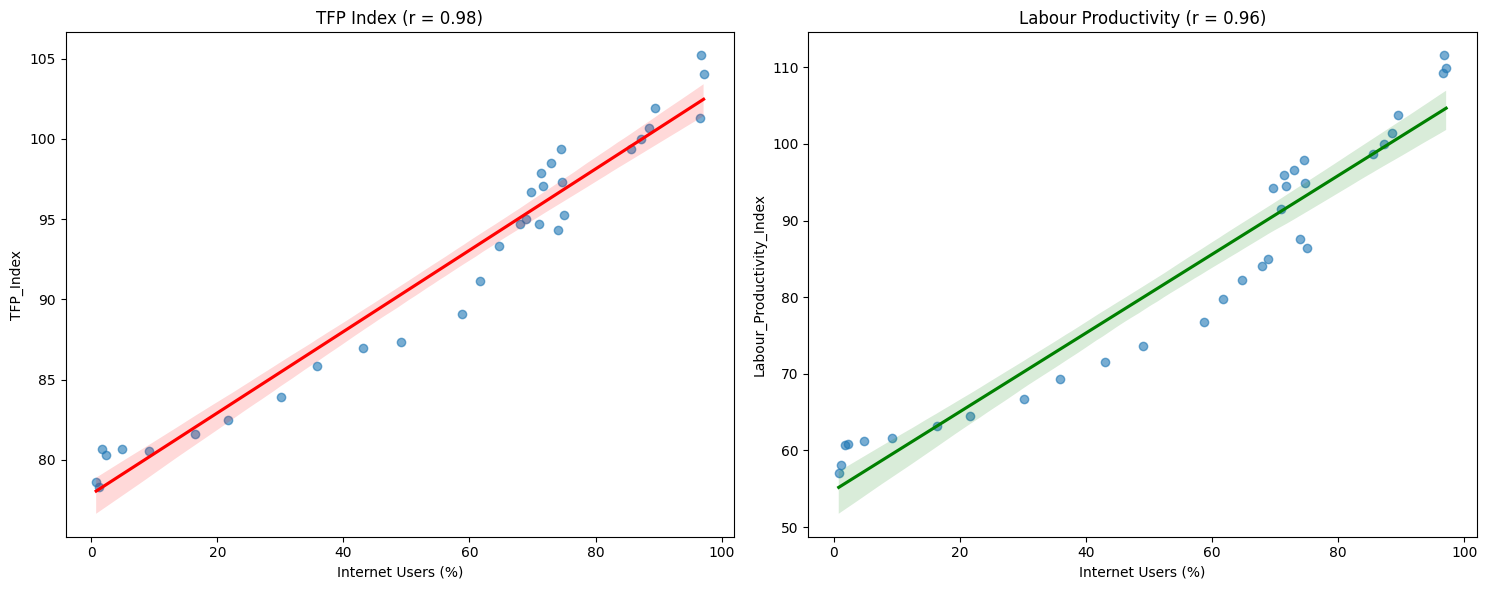

In [ ]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

merged_df['Internet Users (%)'] = pd.to_numeric(merged_df['Internet Users (%)'], errors='coerce')
merged_df['TFP_Index'] = pd.to_numeric(merged_df['TFP_Index'], errors='coerce')
merged_df['Labour_Productivity_Index'] = pd.to_numeric(merged_df['Labour_Productivity_Index'], errors='coerce')

# TFP vs Internet
sns.regplot(x='Internet Users (%)', y='TFP_Index', data=merged_df, ax=ax1,
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
ax1.set_title(f"TFP Index (r = {merged_df[['Internet Users (%)','TFP_Index']].corr().iloc[0,1]:.2f})")

# Labour Productivity vs Internet
sns.regplot(x='Internet Users (%)', y='Labour_Productivity_Index', data=merged_df, ax=ax2,
            scatter_kws={'alpha':0.6}, line_kws={'color':'green'})
ax2.set_title(f"Labour Productivity (r = {merged_df[['Internet Users (%)','Labour_Productivity_Index']].corr().iloc[0,1]:.2f})")

plt.tight_layout()
plt.show()

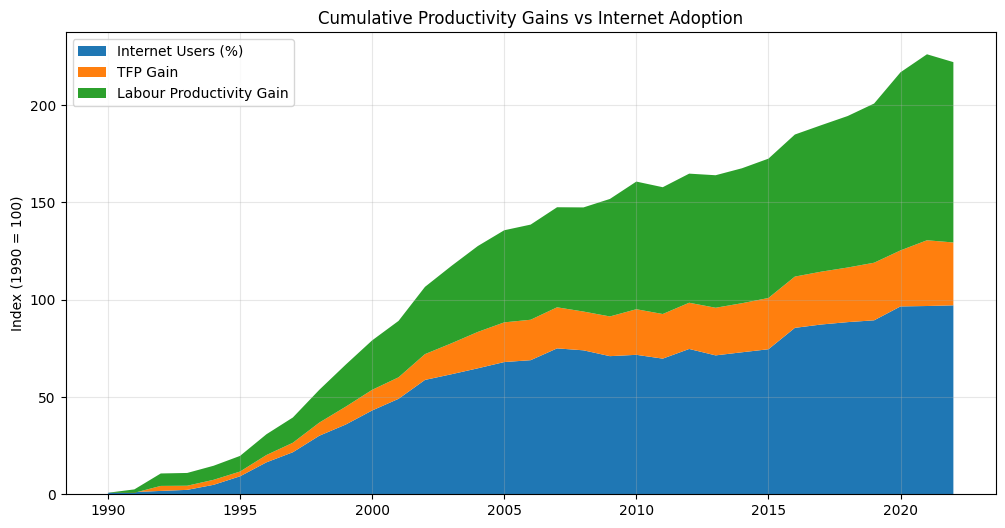

In [ ]:
# Normalize to 1990=100
norm_df = merged_df.copy()
for col in ['TFP_Index', 'Labour_Productivity_Index']:
    norm_df[col] = norm_df[col] / norm_df[col].iloc[0] * 100

plt.figure(figsize=(12,6))
plt.stackplot(norm_df['Year'],
              norm_df['Internet Users (%)'],
              norm_df['TFP_Index']-100,
              norm_df['Labour_Productivity_Index']-100,
              labels=['Internet Users (%)', 'TFP Gain', 'Labour Productivity Gain'])
plt.title("Cumulative Productivity Gains vs Internet Adoption")
plt.ylabel("Index (1990 = 100)")
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()